In [ ]:
import pypsa
import pandas as pd
import numpy as np
import networkx as nx

def find_isolated_buses(network):
    """
    Find buses that are not connected to any lines or transformers.
    
    Parameters:
    -----------
    network : pypsa.Network
        The PyPSA network to analyze
    
    Returns:
    --------
    isolated_buses : list
        List of isolated bus IDs
    """
    # Check if buses are connected to any lines (as bus0 or bus1)
    connected_to_lines = set(network.lines.bus0).union(set(network.lines.bus1))
    
    # Check if buses are connected to any transformers (if they exist in the network)
    connected_to_transformers = set()
    if hasattr(network, 'transformers') and not network.transformers.empty:
        connected_to_transformers = set(network.transformers.bus0).union(set(network.transformers.bus1))
    
    # Check if buses are connected to any links (if they exist in the network)
    connected_to_links = set()
    if hasattr(network, 'links') and not network.links.empty:
        connected_to_links = set(network.links.bus0).union(set(network.links.bus1))
    
    # Combine all connected buses
    all_connected_buses = connected_to_lines.union(connected_to_transformers).union(connected_to_links)
    
    # Find isolated buses
    all_buses = set(network.buses.index)
    isolated_buses = all_buses - all_connected_buses
    
    return list(isolated_buses)

# Load your network (replace with your actual loading code if different)
# Example: network50 = pypsa.Network('path/to/your/network.nc')

# If network50 is already loaded, use this:
if 'network50' in globals():
    isolated_buses = find_isolated_buses(network50)
    print(f"Found {len(isolated_buses)} isolated buses:")
    for bus in isolated_buses:
        print(f"- {bus}")
else:
    print("Please load your network first and name it 'network50', or modify this code to use your network variable name.")


In [2]:
import pypsa

In [3]:
import os

# Go one directory back from the current directory
os.chdir('..')

# Now load the network from the networks folder
network = pypsa.Network("networks/elec_s_5_ec_lc1.0_3h.nc")

# Print current working directory to verify
print(f"Current working directory: {os.getcwd()}")
print(f"Network file exists: {os.path.exists('networks/elec_s_5_ec_lc1.0_3h.nc')}")

INFO:pypsa.io:Imported network elec_s_5_ec_lc1.0_3h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


Current working directory: /Users/antoniagrindrod/Documents/pypsa-earth_project/pypsa-earth-RL
Network file exists: True


In [4]:
network.optimize(solver_name='gurobi')

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io: Writing time: 0.14s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-n_tf37ua.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-n_tf37ua.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 7448 rows, 3416 columns, 11480 nonzeros


INFO:gurobipy:obj: 7448 rows, 3416 columns, 11480 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


INFO:gurobipy:Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


Model fingerprint: 0xb2a7a8b3


INFO:gurobipy:Model fingerprint: 0xb2a7a8b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 2e+02]


INFO:gurobipy:  Matrix range     [1e+00, 2e+02]


  Objective range  [2e+00, 7e+03]


INFO:gurobipy:  Objective range  [2e+00, 7e+03]


  Bounds range     [7e+00, 9e+02]


INFO:gurobipy:  Bounds range     [7e+00, 9e+02]


  RHS range        [2e-03, 1e+06]


INFO:gurobipy:  RHS range        [2e-03, 1e+06]


Presolve removed 6608 rows and 969 columns


INFO:gurobipy:Presolve removed 6608 rows and 969 columns


Presolve time: 0.10s


INFO:gurobipy:Presolve time: 0.10s


INFO:gurobipy:


Solved in 0 iterations and 0.11 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.11 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
INFO:linopy.solvers:Unable to save solution file. Raised error: Unable to retrieve attribute 'X'
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



('warning', 'infeasible_or_unbounded')

In [2]:
import pypsa
import gurobipy as gp
import os

# Go one directory back from the current directory
os.chdir('..')

# Now load the network from the networks folder
n = pypsa.Network("networks/elec_s_5_ec_lc1.0_3h.nc")

# Try with Gurobi's DualReductions=0 to distinguish infeasible vs unbounded
try:
    n.optimize(
        solver_name='gurobi', 
        solver_options={
            'DualReductions': 0,  # Helps distinguish infeasible vs unbounded
            'InfUnbdInfo': 1      # Get more info about infeasibility
        }
    )
except Exception as e:
    print(f"Optimization result: {e}")

# Check if it's actually unbounded (costs too low/negative)
print("Generator marginal costs:")
print(n.generators[['carrier', 'marginal_cost']].groupby('carrier').mean())

INFO:pypsa.io:Imported network elec_s_5_ec_lc1.0_3h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - DualReductions: 0
 - InfUnbdInfo: 1
INFO:linopy.io: Writing time: 0.13s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-ghcskqkt.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-ghcskqkt.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 7448 rows, 3416 columns, 11480 nonzeros


INFO:gurobipy:obj: 7448 rows, 3416 columns, 11480 nonzeros


Set parameter DualReductions to value 0


INFO:gurobipy:Set parameter DualReductions to value 0


Set parameter InfUnbdInfo to value 1


INFO:gurobipy:Set parameter InfUnbdInfo to value 1


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


DualReductions  0


INFO:gurobipy:DualReductions  0


InfUnbdInfo  1


INFO:gurobipy:InfUnbdInfo  1


INFO:gurobipy:


Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


INFO:gurobipy:Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


Model fingerprint: 0xb2a7a8b3


INFO:gurobipy:Model fingerprint: 0xb2a7a8b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 2e+02]


INFO:gurobipy:  Matrix range     [1e+00, 2e+02]


  Objective range  [2e+00, 7e+03]


INFO:gurobipy:  Objective range  [2e+00, 7e+03]


  Bounds range     [7e+00, 9e+02]


INFO:gurobipy:  Bounds range     [7e+00, 9e+02]


  RHS range        [2e-03, 1e+06]


INFO:gurobipy:  RHS range        [2e-03, 1e+06]


Presolve time: 0.30s


INFO:gurobipy:Presolve time: 0.30s


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


INFO:gurobipy:


Solved in 5956 iterations and 0.60 seconds (0.10 work units)


INFO:gurobipy:Solved in 5956 iterations and 0.60 seconds (0.10 work units)


Infeasible model


INFO:gurobipy:Infeasible model
Status: warning
Termination condition: infeasible
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 3



Generator marginal costs:
            marginal_cost
carrier                  
CCGT            46.803121
biomass         15.828205
coal            30.098840
nuclear         14.013271
offwind-ac       0.015000
offwind-dc       0.015000
onwind           0.015000
ror              0.000000
solar            0.010000


In [3]:
import pypsa
import gurobipy as gp

# Load network
n = pypsa.Network("networks/elec_s_5_ec_lc1.0_3h.nc")

# Get detailed infeasibility information from Gurobi
try:
    n.optimize(
        solver_name='gurobi',
        solver_options={
            'DualReductions': 0,
            'InfUnbdInfo': 1,
            'IISMethod': 1,  # Find Irreducible Inconsistent Subsystem
            'ResultFile': 'model.ilp'  # Write detailed results
        }
    )
except Exception as e:
    print(f"Expected infeasibility: {e}")

# The .ilp file will contain detailed infeasibility information
# Check if model.ilp was created in your working directory
import os
if os.path.exists('model.ilp'):
    print("✅ Infeasibility report saved to model.ilp")
    print("This file contains details about which constraints are conflicting")
else:
    print("❌ No infeasibility report generated")

ERROR! Session/line number was not unique in database. History logging moved to new session 212


INFO:pypsa.io:Imported network elec_s_5_ec_lc1.0_3h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.model:Solver options:
 - DualReductions: 0
 - InfUnbdInfo: 1
 - IISMethod: 1
 - ResultFile: model.ilp
INFO:linopy.io: Writing time: 0.1s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-mg2umyve.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-mg2umyve.lp


Reading time = 0.11 seconds


INFO:gurobipy:Reading time = 0.11 seconds


obj: 7448 rows, 3416 columns, 11480 nonzeros


INFO:gurobipy:obj: 7448 rows, 3416 columns, 11480 nonzeros


Set parameter DualReductions to value 0


INFO:gurobipy:Set parameter DualReductions to value 0


Set parameter InfUnbdInfo to value 1


INFO:gurobipy:Set parameter InfUnbdInfo to value 1


Set parameter IISMethod to value 1


INFO:gurobipy:Set parameter IISMethod to value 1


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Non-default parameters:


INFO:gurobipy:Non-default parameters:


DualReductions  0


INFO:gurobipy:DualReductions  0


IISMethod  1


INFO:gurobipy:IISMethod  1


InfUnbdInfo  1


INFO:gurobipy:InfUnbdInfo  1


INFO:gurobipy:


Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


INFO:gurobipy:Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


Model fingerprint: 0xb2a7a8b3


INFO:gurobipy:Model fingerprint: 0xb2a7a8b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 2e+02]


INFO:gurobipy:  Matrix range     [1e+00, 2e+02]


  Objective range  [2e+00, 7e+03]


INFO:gurobipy:  Objective range  [2e+00, 7e+03]


  Bounds range     [7e+00, 9e+02]


INFO:gurobipy:  Bounds range     [7e+00, 9e+02]


  RHS range        [2e-03, 1e+06]


INFO:gurobipy:  RHS range        [2e-03, 1e+06]


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


INFO:gurobipy:


Solved in 5956 iterations and 0.21 seconds (0.10 work units)


INFO:gurobipy:Solved in 5956 iterations and 0.21 seconds (0.10 work units)


Infeasible model


INFO:gurobipy:Infeasible model


INFO:gurobipy:


IIS computed: 5 constraints, 0 bounds


INFO:gurobipy:IIS computed: 5 constraints, 0 bounds


INFO:gurobipy:


Wrote requested result file 'model.ilp'


INFO:gurobipy:Wrote requested result file 'model.ilp'


INFO:gurobipy:
Status: warning
Termination condition: infeasible
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 3



✅ Infeasibility report saved to model.ilp
This file contains details about which constraints are conflicting


In [4]:
# Read the IIS report to see which constraints are conflicting
try:
    with open('model.ilp', 'r') as f:
        ilp_content = f.read()
    
    print("=== INFEASIBILITY REPORT ===")
    print(ilp_content)
    
except FileNotFoundError:
    print("model.ilp file not found in current directory")
    import os
    print("Current directory:", os.getcwd())
    print("Files in directory:", os.listdir('.'))

=== INFEASIBILITY REPORT ===
\ Model obj_copy
\ LP format - for model browsing. Use MPS format to capture full model detail.
\ Signature: 0xec82e2d58374482e
Minimize
 
Subject To
 c2270: x30 <= 0
 c2271: x31 <= 0
 c2272: x32 <= 3.79788066057
 c2273: x33 <= 0
 c6888: x30 + x31 + x32 + x33 = 878.658729688
Bounds
 x30 free
 x31 free
 x32 free
 x33 free
End



In [6]:
# Check this to see the renewable variability
print("Solar capacity factors (first 24 hours):")
if 'solar' in n.generators.carrier.values:
    solar_gens = n.generators[n.generators.carrier == 'solar'].index
    for gen in solar_gens[:1]:  # Just first solar generator
        if gen in n.generators_t.p_max_pu.columns:
            print(n.generators_t.p_max_pu[gen].head(24))

Solar capacity factors (first 24 hours):
snapshot
2013-01-01 00:00:00    0.000000
2013-01-01 03:00:00    0.011575
2013-01-01 06:00:00    0.307586
2013-01-01 09:00:00    0.595948
2013-01-01 12:00:00    0.577849
2013-01-01 15:00:00    0.207901
2013-01-01 18:00:00    0.000000
2013-01-01 21:00:00    0.000000
2013-01-02 00:00:00    0.000000
2013-01-02 03:00:00    0.014298
2013-01-02 06:00:00    0.347857
2013-01-02 09:00:00    0.636970
2013-01-02 12:00:00    0.596455
2013-01-02 15:00:00    0.215121
2013-01-02 18:00:00    0.000000
2013-01-02 21:00:00    0.000000
2013-01-03 00:00:00    0.000000
2013-01-03 03:00:00    0.012504
2013-01-03 06:00:00    0.312092
2013-01-03 09:00:00    0.590556
2013-01-03 12:00:00    0.547503
2013-01-03 15:00:00    0.203254
2013-01-03 18:00:00    0.000000
2013-01-03 21:00:00    0.000000
Name: ZA0 0 solar, dtype: float64


In [7]:
import pypsa
n = pypsa.Network("networks/elec_s_5_ec_lc1.0_3h.nc")

print("=== LOAD SHEDDING DEBUG ===")

# Check if load shedding generators exist
load_shed_gens = n.generators[n.generators.carrier == 'load']
print(f"Load shedding generators found: {len(load_shed_gens)}")

if len(load_shed_gens) > 0:
    print("Load shedding generators:")
    print(load_shed_gens[['bus', 'p_nom', 'marginal_cost']])
    
    # Check their parameters
    print(f"Load shedding capacity: {load_shed_gens.p_nom.sum():.2f} MW")
    print(f"Load shedding cost: {load_shed_gens.marginal_cost.iloc[0]:.2f} €/MWh")
else:
    print("🔴 NO LOAD SHEDDING GENERATORS FOUND!")
    print("This explains the infeasibility")

# Also check what carriers exist
print(f"\nAll generator carriers: {n.generators.carrier.unique()}")
print(f"All generator types: {len(n.generators)} generators total")

INFO:pypsa.io:Imported network elec_s_5_ec_lc1.0_3h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


=== LOAD SHEDDING DEBUG ===
Load shedding generators found: 0
🔴 NO LOAD SHEDDING GENERATORS FOUND!
This explains the infeasibility

All generator carriers: ['CCGT' 'nuclear' 'offwind-ac' 'offwind-dc' 'onwind' 'solar' 'coal' 'ror'
 'biomass']
All generator types: 40 generators total


In [8]:
print("=== BUS CARRIER ANALYSIS ===")

# Check bus carriers
print("Bus carriers:")
print(n.buses[['carrier']].head(10))

# Check which carriers are actually defined
print(f"\nDefined carriers in network:")
print(n.carriers.index.tolist())

# See if there's a mismatch
undefined_bus_carriers = set(n.buses.carrier.unique()) - set(n.carriers.index)
print(f"\nUndefined bus carriers: {undefined_bus_carriers}")

# Check if AC buses exist
ac_buses = n.buses[n.buses.carrier == 'AC'] if 'AC' in n.buses.carrier.values else pd.DataFrame()
print(f"\nAC buses found: {len(ac_buses)}")

=== BUS CARRIER ANALYSIS ===
Bus carriers:
      carrier
Bus          
ZA0 0      AC
ZA0 1      AC
ZA0 2      AC
ZA0 3      AC
ZA0 4      AC
ZA1 0      AC
ZA2 0      AC
ZA3 0      AC

Defined carriers in network:
['coal', 'geothermal', 'CCGT', 'biomass', 'OCGT', 'lignite', 'oil', 'nuclear', 'hydro', 'offwind-ac', 'offwind-dc', 'onwind', 'solar', 'PHS', 'ror']

Undefined bus carriers: {'AC'}

AC buses found: 8


In [5]:
import pandas as pd
import pypsa

# Load the network
n = pypsa.Network("networks/elec_s_5_ec_lc1.0_3h.nc")

print("=== SUPPLY-DEMAND ANALYSIS ===")

# Total demand over all snapshots
total_demand = n.loads_t.p_set.sum().sum()
print(f"Total demand: {total_demand:.2f} MWh")

# Calculate available generation capacity
print("\nGeneration capacity by carrier:")
total_gen_capacity = 0

for carrier in n.generators.carrier.unique():
    carrier_gens = n.generators[n.generators.carrier == carrier]
    carrier_capacity = 0
    
    for gen_id in carrier_gens.index:
        gen = n.generators.loc[gen_id]
        
        if gen_id in n.generators_t.p_max_pu.columns:
            # Variable renewable - capacity factor matters
            capacity_factor_profile = n.generators_t.p_max_pu[gen_id]
            max_output = (capacity_factor_profile * gen.p_nom).sum()
        else:
            # Dispatchable - assume can run continuously
            max_output = gen.p_nom * len(n.snapshots)
        
        carrier_capacity += max_output
    
    total_gen_capacity += carrier_capacity
    print(f"  {carrier}: {len(carrier_gens)} units, {carrier_capacity:.2f} MWh potential")

print(f"\nTotal generation potential: {total_gen_capacity:.2f} MWh")
print(f"Supply-demand ratio: {total_gen_capacity/total_demand:.3f}")

if total_gen_capacity < total_demand:
    shortfall = total_demand - total_gen_capacity
    print(f"🔴 INSUFFICIENT CAPACITY: {shortfall:.2f} MWh shortfall ({shortfall/total_demand*100:.1f}%)")
else:
    print("✅ Sufficient generation capacity exists")

INFO:pypsa.io:Imported network elec_s_5_ec_lc1.0_3h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


=== SUPPLY-DEMAND ANALYSIS ===
Total demand: 2219908.86 MWh

Generation capacity by carrier:
  CCGT: 4 units, 189562.26 MWh potential
  nuclear: 1 units, 108640.00 MWh potential
  offwind-ac: 5 units, 0.00 MWh potential
  offwind-dc: 5 units, 0.00 MWh potential
  onwind: 8 units, 50199.98 MWh potential
  solar: 8 units, 62681.05 MWh potential
  coal: 3 units, 2631984.97 MWh potential
  ror: 4 units, 1093.06 MWh potential
  biomass: 2 units, 761.60 MWh potential

Total generation potential: 3044922.93 MWh
Supply-demand ratio: 1.372
✅ Sufficient generation capacity exists


In [10]:
m=n.optimize.create_model()
m.solve(solver_name="gurobi")
labels = m.compute_infeasibilities()

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
Index(['0'], dtype='object', name='SubNetwork')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io: Writing time: 0.14s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-odzii_fn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-odzii_fn.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 7448 rows, 3416 columns, 11480 nonzeros


INFO:gurobipy:obj: 7448 rows, 3416 columns, 11480 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


INFO:gurobipy:Optimize a model with 7448 rows, 3416 columns and 11480 nonzeros


Model fingerprint: 0xb2a7a8b3


INFO:gurobipy:Model fingerprint: 0xb2a7a8b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 2e+02]


INFO:gurobipy:  Matrix range     [1e+00, 2e+02]


  Objective range  [2e+00, 7e+03]


INFO:gurobipy:  Objective range  [2e+00, 7e+03]


  Bounds range     [7e+00, 9e+02]


INFO:gurobipy:  Bounds range     [7e+00, 9e+02]


  RHS range        [2e-03, 1e+06]


INFO:gurobipy:  RHS range        [2e-03, 1e+06]


Presolve removed 6608 rows and 969 columns


INFO:gurobipy:Presolve removed 6608 rows and 969 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


INFO:gurobipy:


Solved in 0 iterations and 0.06 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.06 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
INFO:linopy.solvers:Unable to save solution file. Raised error: Unable to retrieve attribute 'X'
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


INFO:gurobipy:


IIS computed: 5 constraints and 0 bounds


INFO:gurobipy:IIS computed: 5 constraints and 0 bounds


IIS runtime: 0.00 seconds (0.00 work units)


INFO:gurobipy:IIS runtime: 0.00 seconds (0.00 work units)


In [11]:
print(labels)

[2270, 2271, 2272, 2273, 6888]


In [12]:
m.constraints.print_labels(labels)

Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 offwind-ac]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-ac] ≤ -0
Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 offwind-dc]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-dc] ≤ -0
Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 onwind]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 onwind] ≤ 3.79788066057
Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 solar]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 solar] ≤ -0
Bus-nodal_balance[ZA1 0, 2013-01-01 00:00:00]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-ac] + 1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-dc] + 1 Generator-p[2013-01-01 00:00:00, ZA1 0 onwind] + 1 Generator-p[2013-01-01 00:00:00, ZA1 0 solar] = 878.658729688


In [13]:
m.print_infeasibilities()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


INFO:gurobipy:


IIS computed: 5 constraints and 0 bounds


INFO:gurobipy:IIS computed: 5 constraints and 0 bounds


IIS runtime: 0.01 seconds (0.00 work units)


INFO:gurobipy:IIS runtime: 0.01 seconds (0.00 work units)


Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 offwind-ac]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-ac] ≤ -0
Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 offwind-dc]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-dc] ≤ -0
Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 onwind]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 onwind] ≤ 3.79788066057
Generator-fix-p-upper[2013-01-01 00:00:00, ZA1 0 solar]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 solar] ≤ -0
Bus-nodal_balance[ZA1 0, 2013-01-01 00:00:00]: +1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-ac] + 1 Generator-p[2013-01-01 00:00:00, ZA1 0 offwind-dc] + 1 Generator-p[2013-01-01 00:00:00, ZA1 0 onwind] + 1 Generator-p[2013-01-01 00:00:00, ZA1 0 solar] = 878.658729688


In [14]:
# Check all generators in your network
print("=== ALL GENERATORS ===")
print(n.generators[['carrier', 'p_nom', 'p_min_pu', 'p_max_pu', 'marginal_cost']])

# Check specifically for coal
print("\n=== COAL GENERATORS ===")
coal_gens = n.generators[n.generators.carrier == 'coal']
print(coal_gens[['p_nom', 'p_min_pu', 'p_max_pu', 'marginal_cost']])

# Check total coal capacity
print(f"\nTotal coal capacity: {coal_gens.p_nom.sum():.1f} MW")

# Check conventional carriers
print("\n=== CONVENTIONAL CARRIERS ===")
conventional = n.generators[n.generators.carrier.isin(['coal', 'OCGT', 'CCGT', 'nuclear', 'oil'])]
print(conventional.groupby('carrier')['p_nom'].sum())

# Check what's in your specific bus
print(f"\n=== GENERATORS AT BUS ZA1 0 ===")
za1_gens = n.generators[n.generators.bus == 'ZA1 0']
print(za1_gens[['carrier', 'p_nom', 'p_min_pu', 'p_max_pu']])

# Check if generators are actually available at this time
print(f"\n=== GENERATOR AVAILABILITY AT {n.snapshots[0]} ===")
if hasattr(n, 'generators_t') and hasattr(n.generators_t, 'p_max_pu'):
    current_availability = n.generators_t.p_max_pu.loc[n.snapshots[0]]
    for gen in za1_gens.index:
        if gen in current_availability.index:
            max_p = za1_gens.loc[gen, 'p_nom'] * current_availability[gen]
            print(f"{gen} ({za1_gens.loc[gen, 'carrier']}): {max_p:.1f} MW available")

=== ALL GENERATORS ===
                     carrier         p_nom  p_min_pu  p_max_pu  marginal_cost
Generator                                                                    
ZA0 0 CCGT              CCGT   2078.300000       0.0       1.0      46.803121
ZA0 0 nuclear        nuclear   1940.000000       0.0       1.0      14.013271
ZA0 0 offwind-ac  offwind-ac      0.000000       0.0       1.0       0.015000
ZA0 0 offwind-dc  offwind-dc      0.000000       0.0       1.0       0.015000
ZA0 0 onwind          onwind    869.326726       0.0       1.0       0.015000
ZA0 0 solar            solar   1342.994924       0.0       1.0       0.010000
ZA0 1 CCGT              CCGT    670.000000       0.0       1.0      46.803121
ZA0 1 coal              coal   4215.300000       0.0       1.0      30.098840
ZA0 1 offwind-ac  offwind-ac      0.000000       0.0       1.0       0.015000
ZA0 1 offwind-dc  offwind-dc      0.000000       0.0       1.0       0.015000
ZA0 1 onwind          onwind    192.44619

In [15]:
# Check total system demand
print("=== TOTAL SYSTEM DEMAND ===")
total_demand = n.loads_t.p_set.loc[n.snapshots[0]].sum()
print(f"Total system demand at {n.snapshots[0]}: {total_demand:.1f} MW")

# Check demand by bus
print("\n=== DEMAND BY BUS ===")
demand_by_bus = n.loads_t.p_set.loc[n.snapshots[0]]
for bus, demand in demand_by_bus.items():
    if demand > 0:
        print(f"Bus {bus}: {demand:.1f} MW")

# Check load distribution across all loads
print("\n=== ALL LOADS ===")
print(n.loads[['bus', 'p_set']])

# Check if there are time-varying loads
print(f"\n=== LOAD TIME SERIES SHAPE ===")
print(f"loads_t.p_set shape: {n.loads_t.p_set.shape}")
print(f"First few values:\n{n.loads_t.p_set.iloc[0]}")

=== TOTAL SYSTEM DEMAND ===
Total system demand at 2013-01-01 00:00:00: 33114.9 MW

=== DEMAND BY BUS ===
Bus ZA0 0: 3202.1 MW
Bus ZA0 1: 5828.7 MW
Bus ZA0 2: 4394.0 MW
Bus ZA0 3: 3334.6 MW
Bus ZA0 4: 14733.2 MW
Bus ZA1 0: 878.7 MW
Bus ZA2 0: 286.8 MW
Bus ZA3 0: 456.9 MW

=== ALL LOADS ===
         bus  p_set
Load               
ZA0 0  ZA0 0    0.0
ZA0 1  ZA0 1    0.0
ZA0 2  ZA0 2    0.0
ZA0 3  ZA0 3    0.0
ZA0 4  ZA0 4    0.0
ZA1 0  ZA1 0    0.0
ZA2 0  ZA2 0    0.0
ZA3 0  ZA3 0    0.0

=== LOAD TIME SERIES SHAPE ===
loads_t.p_set shape: (56, 8)
First few values:
Load
ZA0 0     3202.097114
ZA0 1     5828.719037
ZA0 2     4393.962760
ZA0 3     3334.596053
ZA0 4    14733.235138
ZA1 0      878.658730
ZA2 0      286.755203
ZA3 0      456.863542
Name: 2013-01-01 00:00:00, dtype: float64


In [7]:
n=network50
# Check if buses are connected
print("\n=== TRANSMISSION LINES ===")
print("Lines connecting buses:")
print(n.lines[['bus0', 'bus1', 's_nom', 'length']])

# Check if there are any links between regions
if len(n.links) > 0:
    print("\n=== LINKS BETWEEN BUSES ===")
    print(n.links[['bus0', 'bus1', 'p_nom']])
else:
    print("\n❌ NO LINKS found between buses!")

# Summary of supply vs demand by region
print("\n=== SUPPLY VS DEMAND BY REGION ===")
regions = ['ZA0', 'ZA1', 'ZA2', 'ZA3']
for region in regions:
    # Get demand for this region
    region_demand = 0
    for bus in n.buses.index:
        if bus.startswith(region):
            region_demand += n.loads_t.p_set.loc[n.snapshots[0], bus]
    
    # Get available capacity for this region
    region_capacity = 0
    region_available = 0
    for gen in n.generators.index:
        if gen.startswith(region):
            region_capacity += n.generators.loc[gen, 'p_nom']
            # Calculate available capacity considering p_max_pu
            if hasattr(n.generators_t, 'p_max_pu') and gen in n.generators_t.p_max_pu.columns:
                available = n.generators.loc[gen, 'p_nom'] * n.generators_t.p_max_pu.loc[n.snapshots[0], gen]
            else:
                available = n.generators.loc[gen, 'p_nom'] * n.generators.loc[gen, 'p_max_pu']
            region_available += available
    
    print(f"{region}: Demand={region_demand:.1f} MW, Capacity={region_capacity:.1f} MW, Available={region_available:.1f} MW")

# Check total system balance
print(f"\n=== SYSTEM TOTALS ===")
total_demand = n.loads_t.p_set.loc[n.snapshots[0]].sum()
total_capacity = n.generators.p_nom.sum()
total_available = 0
for gen in n.generators.index:
    if hasattr(n.generators_t, 'p_max_pu') and gen in n.generators_t.p_max_pu.columns:
        available = n.generators.loc[gen, 'p_nom'] * n.generators_t.p_max_pu.loc[n.snapshots[0], gen]
    else:
        available = n.generators.loc[gen, 'p_nom'] * n.generators.loc[gen, 'p_max_pu']
    total_available += available

print(f"Total demand: {total_demand:.1f} MW")
print(f"Total capacity: {total_capacity:.1f} MW") 
print(f"Total available: {total_available:.1f} MW")
print(f"Shortfall: {total_demand - total_available:.1f} MW")


=== TRANSMISSION LINES ===
Lines connecting buses:
        bus0    bus1         s_nom      length
Line                                          
0      ZA0 0  ZA0 12   6247.230135  258.297921
1      ZA0 0  ZA0 15    442.400417  224.005848
10    ZA0 10  ZA0 29    442.400417  208.503439
11    ZA0 10   ZA0 4    442.400417  242.543123
12    ZA0 11  ZA0 30  11039.901322  179.535362
...      ...     ...           ...         ...
92    ZA0 42   ZA0 8  27402.013724  151.204006
93    ZA0 42   ZA0 9   1769.601669  128.677490
94    ZA0 45  ZA0 48   3207.403025  131.400003
95    ZA0 47   ZA0 5  16978.635887  263.670120
96    ZA0 48   ZA0 8  34126.276632  134.966695

[97 rows x 4 columns]

❌ NO LINKS found between buses!

=== SUPPLY VS DEMAND BY REGION ===
ZA0: Demand=31674.7 MW, Capacity=61234.3 MW, Available=53398.9 MW
ZA1: Demand=883.7 MW, Capacity=122.7 MW, Available=3.7 MW
ZA2: Demand=288.4 MW, Capacity=7.7 MW, Available=0.0 MW
ZA3: Demand=459.5 MW, Capacity=30.8 MW, Available=3.7 MW

=== SYS

In [17]:
# Check transmission connections to each region
print("=== TRANSMISSION CONNECTIVITY ===")
regions = ['ZA0', 'ZA1', 'ZA2', 'ZA3']

for region in regions:
    print(f"\n{region} region connections:")
    connections = []
    
    # Check lines where this region is involved
    for idx, line in n.lines.iterrows():
        bus0_region = line['bus0'][:3]  # Get ZA0, ZA1, etc.
        bus1_region = line['bus1'][:3]
        
        if bus0_region == region:
            connections.append(f"  → {line['bus1']} ({line['s_nom']:.1f} MW)")
        elif bus1_region == region:
            connections.append(f"  ← {line['bus0']} ({line['s_nom']:.1f} MW)")
    
    if connections:
        for conn in connections:
            print(conn)
    else:
        print(f"  ❌ {region} has NO transmission connections to other regions!")

# Verify the isolated ZA1 0 problem specifically
print(f"\n=== ZA1 0 BUS ISOLATION ===")
print(f"ZA1 0 demand: {n.loads_t.p_set.loc[n.snapshots[0], 'ZA1 0']:.1f} MW")
print(f"ZA1 0 available generation: 3.8 MW")
print(f"Deficit: {n.loads_t.p_set.loc[n.snapshots[0], 'ZA1 0'] - 3.8:.1f} MW")
print("No transmission lines connect ZA1 0 to any ZA0 bus with coal generators")

=== TRANSMISSION CONNECTIVITY ===

ZA0 region connections:
  → ZA0 2 (33287.1 MW)
  → ZA0 3 (11167.3 MW)
  → ZA0 2 (6394.7 MW)
  → ZA0 3 (2359.5 MW)
  → ZA0 4 (33895.0 MW)
  → ZA0 3 (62686.5 MW)
  → ZA0 4 (91265.8 MW)

ZA1 region connections:
  ❌ ZA1 has NO transmission connections to other regions!

ZA2 region connections:
  ❌ ZA2 has NO transmission connections to other regions!

ZA3 region connections:
  ❌ ZA3 has NO transmission connections to other regions!

=== ZA1 0 BUS ISOLATION ===
ZA1 0 demand: 878.7 MW
ZA1 0 available generation: 3.8 MW
Deficit: 874.9 MW
No transmission lines connect ZA1 0 to any ZA0 bus with coal generators


In [18]:
# Check if renewable generators have p_set in time series
print("=== RENEWABLE GENERATOR p_set CHECK ===")

# Check what's in generators_t
print(f"generators_t attributes: {list(n.generators_t.__dict__.keys())}")

# Check if p_set exists for generators
if hasattr(n.generators_t, 'p_set'):
    print(f"generators_t.p_set shape: {n.generators_t.p_set.shape}")
    print(f"generators_t.p_set columns: {list(n.generators_t.p_set.columns)}")
    
    # Check renewable generators specifically
    renewable_gens = n.generators[n.generators.carrier.isin(['solar', 'onwind', 'offwind-ac', 'offwind-dc'])]
    print(f"\n=== RENEWABLE GENERATOR p_set VALUES ===")
    for gen in renewable_gens.index[:5]:  # First 5 renewable generators
        if gen in n.generators_t.p_set.columns:
            p_set_val = n.generators_t.p_set.loc[n.snapshots[0], gen]
            p_max_pu_val = n.generators_t.p_max_pu.loc[n.snapshots[0], gen] if hasattr(n.generators_t, 'p_max_pu') else "N/A"
            print(f"{gen}: p_set={p_set_val}, p_max_pu={p_max_pu_val}")
else:
    print("❌ No generators_t.p_set found!")

# Check renewable generator control types
print(f"\n=== RENEWABLE GENERATOR CONTROL ===")
renewable_gens = n.generators[n.generators.carrier.isin(['solar', 'onwind', 'offwind-ac', 'offwind-dc'])]
print(renewable_gens[['carrier', 'control', 'p_nom']].head(10))

=== RENEWABLE GENERATOR p_set CHECK ===
generators_t attributes: []
generators_t.p_set shape: (56, 0)
generators_t.p_set columns: []

=== RENEWABLE GENERATOR p_set VALUES ===

=== RENEWABLE GENERATOR CONTROL ===
                     carrier control        p_nom
Generator                                        
ZA0 0 offwind-ac  offwind-ac             0.000000
ZA0 0 offwind-dc  offwind-dc             0.000000
ZA0 0 onwind          onwind           869.326726
ZA0 0 solar            solar          1342.994924
ZA0 1 offwind-ac  offwind-ac             0.000000
ZA0 1 offwind-dc  offwind-dc             0.000000
ZA0 1 onwind          onwind           192.446194
ZA0 1 solar            solar           420.748792
ZA0 2 offwind-ac  offwind-ac             0.000000
ZA0 2 offwind-dc  offwind-dc             0.000000


In [22]:
# Quick transmission fix to connect all isolated regions
print("=== CONNECTING ISOLATED REGIONS ===")

# Add transmission lines to connect all regions to main grid
transmission_fixes = [
    # Connect ZA1 to coal-rich ZA0 region
    {"name": "fix_ZA0_4_to_ZA1_0", "bus0": "ZA0 4", "bus1": "ZA1 0", "s_nom": 2000},
    
    # Connect ZA2 to main grid
    {"name": "fix_ZA0_2_to_ZA2_0", "bus0": "ZA0 2", "bus1": "ZA2 0", "s_nom": 1000},
    
    # Connect ZA3 to main grid  
    {"name": "fix_ZA0_3_to_ZA3_0", "bus0": "ZA0 3", "bus1": "ZA3 0", "s_nom": 1000},
]

for line in transmission_fixes:
    n.add("Line", line["name"],
          bus0=line["bus0"], 
          bus1=line["bus1"],
          s_nom=line["s_nom"],
          length=500,  # Reasonable assumption
          r=0.01, x=0.1)  # Standard transmission parameters

print("Added transmission connections:")
for line in transmission_fixes:
    print(f"  {line['bus0']} ↔ {line['bus1']}: {line['s_nom']} MW")

# Test optimization
try:
    n.optimize(solver_name='gurobi')
    print("✅ SUCCESS! 5-node network now works with transmission fixes")
    print(f"Objective: {n.objective:,.0f}")
    
    # Save this working network for RL training
    n.export_to_netcdf("elec_s_5_ec_lc1.0_3h_connected.nc")
    print("💾 Saved connected network as: elec_s_5_ec_lc1.0_3h_connected.nc")
    
except Exception as e:
    print(f"❌ Still having issues: {e}")

=== CONNECTING ISOLATED REGIONS ===
Added transmission connections:
  ZA0 4 ↔ ZA1 0: 2000 MW
  ZA0 2 ↔ ZA2 0: 1000 MW
  ZA0 3 ↔ ZA3 0: 1000 MW


Index(['0', '1', '2', '3', '4', '5', '6', 'fix_ZA0_4_to_ZA1_0',
       'fix_ZA0_2_to_ZA2_0', 'fix_ZA0_3_to_ZA3_0'],
      dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
Index(['0'], dtype='object', name='SubNetwork')
Index(['0', '1', '2', '3', '4', '5', '6', 'fix_ZA0_4_to_ZA1_0',
       'fix_ZA0_2_to_ZA2_0', 'fix_ZA0_3_to_ZA3_0'],
      dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA1 0', 'ZA2 0', 'ZA3 0'], dtype='object', name='Bus')
Index(['0'], dtype='object', name='SubNetwork')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io: Writing time: 0.23s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-rs53pgn_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-rs53pgn_.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7784 rows, 3584 columns, 12152 nonzeros


INFO:gurobipy:obj: 7784 rows, 3584 columns, 12152 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 7784 rows, 3584 columns and 12152 nonzeros


INFO:gurobipy:Optimize a model with 7784 rows, 3584 columns and 12152 nonzeros


Model fingerprint: 0x9aad4685


INFO:gurobipy:Model fingerprint: 0x9aad4685


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e+00, 2e+02]


INFO:gurobipy:  Matrix range     [1e+00, 2e+02]


  Objective range  [2e+00, 7e+03]


INFO:gurobipy:  Objective range  [2e+00, 7e+03]


  Bounds range     [7e+00, 9e+02]


INFO:gurobipy:  Bounds range     [7e+00, 9e+02]


  RHS range        [2e-03, 1e+06]


INFO:gurobipy:  RHS range        [2e-03, 1e+06]


Presolve removed 7606 rows and 2654 columns


INFO:gurobipy:Presolve removed 7606 rows and 2654 columns


Presolve time: 0.17s


INFO:gurobipy:Presolve time: 0.17s


Presolved: 178 rows, 930 columns, 1394 nonzeros


INFO:gurobipy:Presolved: 178 rows, 930 columns, 1394 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0    6.9558828e+09   8.350750e+04   0.000000e+00      0s


INFO:gurobipy:       0    6.9558828e+09   8.350750e+04   0.000000e+00      0s


     228    9.5727753e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     228    9.5727753e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 228 iterations and 0.23 seconds (0.01 work units)


INFO:gurobipy:Solved in 228 iterations and 0.23 seconds (0.01 work units)


Optimal objective  9.572775279e+09


INFO:gurobipy:Optimal objective  9.572775279e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3584 primals, 7784 duals
Objective: 9.57e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.


✅ SUCCESS! 5-node network now works with transmission fixes
Objective: 9,572,775,279


INFO:pypsa.io:Exported network 'elec_s_5_ec_lc1.0_3h_connected.nc' contains: carriers, lines, loads, global_constraints, storage_units, buses, generators


💾 Saved connected network as: elec_s_5_ec_lc1.0_3h_connected.nc


In [ ]:
print("=== GENERATOR CONTROL ANALYSIS ===")
control_summary = n.generators.groupby(['carrier', 'control']).agg({
    'p_nom': ['count', 'sum']
}).round(1)
print(control_summary)


=== GENERATOR CONTROL ANALYSIS ===
                   p_nom         
                   count      sum
carrier    control               
CCGT                   3   1306.7
           Slack       1   2078.3
biomass                2     13.6
coal                   3  46999.7
nuclear                1   1940.0
offwind-ac             3      0.0
           Slack       2      0.0
offwind-dc             5      0.0
onwind                 7   3392.9
           Slack       1      1.7
ror                    4     67.4
solar                  8   5592.6

=== YOUR RL AGENT CONTROLLABLE GENERATORS ===


NameError: name 'self' is not defined

In [23]:
# Load your network
n = pypsa.Network("elec_s_5_ec_lc1.0_3h_connected.nc")  # or your full network

print("=== CARRIERS FOUND IN NETWORK ===")

# Check generator carriers
print("Generator carriers:")
gen_carriers = n.generators.carrier.unique()
for carrier in sorted(gen_carriers):
    count = (n.generators.carrier == carrier).sum()
    total_capacity = n.generators[n.generators.carrier == carrier].p_nom.sum()
    print(f"  {carrier}: {count} generators, {total_capacity:.1f} MW")

# Check other component carriers (if any)
components_with_carriers = ['buses', 'lines', 'links', 'loads', 'storage_units', 'stores']

for component in components_with_carriers:
    if hasattr(n, component):
        df = getattr(n, component)
        if 'carrier' in df.columns and not df.empty:
            carriers = df.carrier.dropna().unique()
            if len(carriers) > 0:
                print(f"\n{component.title()} carriers:")
                for carrier in sorted(carriers):
                    count = (df.carrier == carrier).sum()
                    print(f"  {carrier}: {count} {component}")

# Check what carriers are referenced but not defined
print(f"\n=== REFERENCED BUT UNDEFINED CARRIERS ===")
all_carriers = set()

# Collect all carrier references
for component in ['generators', 'buses', 'lines', 'links', 'loads', 'storage_units', 'stores']:
    if hasattr(n, component):
        df = getattr(n, component)
        if 'carrier' in df.columns:
            carriers = df.carrier.dropna().unique()
            all_carriers.update(carriers)

# Check which are defined
if hasattr(n, 'carriers') and not n.carriers.empty:
    defined_carriers = set(n.carriers.index)
    undefined_carriers = all_carriers - defined_carriers
    print("Undefined carriers:", sorted(undefined_carriers))
else:
    print("No carriers defined in network")
    print("All referenced carriers:", sorted(all_carriers))

INFO:pypsa.io:Imported network elec_s_5_ec_lc1.0_3h_connected.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


=== CARRIERS FOUND IN NETWORK ===
Generator carriers:
  CCGT: 4 generators, 3385.0 MW
  biomass: 2 generators, 13.6 MW
  coal: 3 generators, 46999.7 MW
  nuclear: 1 generators, 1940.0 MW
  offwind-ac: 5 generators, 0.0 MW
  offwind-dc: 5 generators, 0.0 MW
  onwind: 8 generators, 3394.6 MW
  ror: 4 generators, 67.4 MW
  solar: 8 generators, 5592.6 MW

Buses carriers:
  AC: 8 buses

Lines carriers:
  AC: 10 lines

Loads carriers:
  : 8 loads

Storage_Units carriers:
  PHS: 2 storage_units
  hydro: 2 storage_units

=== REFERENCED BUT UNDEFINED CARRIERS ===
Undefined carriers: ['', 'AC']


In [4]:
network50=pypsa.Network("networks/elec_s_50_ec_lc1.0_1h.nc")

INFO:pypsa.io:Imported network elec_s_50_ec_lc1.0_1h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [5]:
network50.optimize(solver_name='gurobi')

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95',
       '96'],
      dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 10', 'ZA0 11', 'ZA0 12', 'ZA0 13', 'ZA0 14',
       'ZA0 15', 'ZA0 16', 'ZA0 17', 'ZA0 18', 'ZA0 19', 'ZA0 2', 'ZA0 20',
       'ZA0 21', 'ZA0 22', 'ZA0 23', 'ZA0 24', 'ZA0 25', 'ZA0 26', 'ZA0 27',
       'ZA0 28', 'ZA0 29', 'ZA0 3', 'ZA0 30', 'ZA0 31', 'ZA0 32', 'ZA0 33',
       'ZA0 34', 'ZA0 35'

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-uov6_xyv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-uov6_xyv.lp


Reading time = 14.87 seconds


INFO:gurobipy:Reading time = 14.87 seconds


obj: 5729040 rows, 2417760 columns, 10301760 nonzeros


INFO:gurobipy:obj: 5729040 rows, 2417760 columns, 10301760 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 5729040 rows, 2417760 columns and 10301760 nonzeros


INFO:gurobipy:Optimize a model with 5729040 rows, 2417760 columns and 10301760 nonzeros


Model fingerprint: 0xb319bca2


INFO:gurobipy:Model fingerprint: 0xb319bca2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [7e-01, 1e+03]


INFO:gurobipy:  Matrix range     [7e-01, 1e+03]


  Objective range  [1e-02, 5e+01]


INFO:gurobipy:  Objective range  [1e-02, 5e+01]


  Bounds range     [8e-01, 1e+03]


INFO:gurobipy:  Bounds range     [8e-01, 1e+03]


  RHS range        [8e-05, 1e+06]


INFO:gurobipy:  RHS range        [8e-05, 1e+06]


Presolve removed 4800480 rows and 602195 columns


INFO:gurobipy:Presolve removed 4800480 rows and 602195 columns


Presolve time: 4.43s


INFO:gurobipy:Presolve time: 4.43s


INFO:gurobipy:


Solved in 0 iterations and 4.43 seconds (0.96 work units)


INFO:gurobipy:Solved in 0 iterations and 4.43 seconds (0.96 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
INFO:linopy.solvers:Unable to save solution file. Raised error: Unable to retrieve attribute 'X'
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



('warning', 'infeasible_or_unbounded')

In [6]:
n_base = pypsa.Network("networks/base.nc")
print(n_base.buses)

Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

      v_nom      symbol  under_construction tag_substation  tag_area      lon  \
Bus                                                                             
0      88.0  substation               False   transmission       0.0  28.0877   
1     132.0  substation               False   transmission       0.0  28.0887   
2     275.0  substation               False   transmission       0.0  28.0897   
3     400.0  substation               False   transmission       0.0  28.0907   
4     132.0  substation               False   transmission       0.0  25.5638   
...     ...         ...                 ...            ...       ...      ...   
1592   88.0  substation               False   transmission       0.0  26.1865   
1593   66.0  substation               False   transmission       0.0  24.7486   
1594  400.0  substation               False   transmission       0.0  30.1986   
1595  132.0  substation               False   transmission       0.0  21.3169   
1596  132.0  substation     

In [17]:
# Convert Series to sets for proper membership checking
bus0_values = set(network50.lines.bus0.values)
bus1_values = set(network50.lines.bus1.values)

print("=== ISOLATED BUSES ===")
isolated_buses = []

for bus in network50.buses.index:
    if (bus not in bus0_values) and (bus not in bus1_values):
        isolated_buses.append(bus)
        print(f"Isolated bus: {bus}")

print(f"\nFound {len(isolated_buses)} isolated buses out of {len(network50.buses)} total buses")

=== ISOLATED BUSES ===
Isolated bus: ZA1 0
Isolated bus: ZA2 0
Isolated bus: ZA3 0

Found 3 isolated buses out of 53 total buses


In [16]:
print(type(network50.lines.bus0))

<class 'pandas.core.series.Series'>


In [ ]:
# Print unique line types in the network
print("=== UNIQUE LINE TYPES ===")
unique_types = network50.lines.type.unique()
print(unique_types)

# If you want more details about each type
if len(unique_types) > 0:
    print("\n=== LINE TYPE DETAILS ===")
    for line_type in unique_types:
        if line_type is not None:  # Skip None values
            count = (network50.lines.type == line_type).sum()
            print(f"Type: {line_type}")
            print(f"Count: {count} lines")
            print(f"Example line: {network50.lines[network50.lines.type == line_type].index[0]}")
            print()
else:
    print("\nNo line types defined in the network")


In [18]:
import pypsa
import pandas as pd

# Load the network before simplification
n_base = pypsa.Network("networks/elec.nc")

# Check network topology
n_base.determine_network_topology()
print(f"Number of sub-networks: {len(n_base.sub_networks)}")
print("Sub-network info:")
print(n_base.sub_networks)

# Find isolated buses
connected_buses = set()
for sub_net in n_base.sub_networks.index:
    buses_in_subnet = n_base.buses[n_base.buses.sub_network == sub_net]
    if len(buses_in_subnet) > 1:  # Main grid
        connected_buses.update(buses_in_subnet.index)

isolated_buses = n_base.buses.index.difference(connected_buses)
print(f"Isolated buses in original network: {len(isolated_buses)}")
print("Isolated bus details:")
print(n_base.buses.loc[isolated_buses])

Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

Number of sub-networks: 61
Sub-network info:
attribute  carrier slack_bus            obj
SubNetwork                                 
0               AC       347   SubNetwork 0
1               AC       454   SubNetwork 1
2               AC       524   SubNetwork 2
3               AC       532   SubNetwork 3
4               AC       583   SubNetwork 4
...            ...       ...            ...
56              AC      1317  SubNetwork 56
57              AC      1329  SubNetwork 57
58              AC      1330  SubNetwork 58
59              AC      1355  SubNetwork 59
60              AC      1368  SubNetwork 60

[61 rows x 3 columns]
Isolated buses in original network: 45
Isolated bus details:
      v_nom      symbol  under_construction tag_substation  tag_area      lon  \
Bus                                                                             
1009  132.0  substation               False   transmission       0.0  27.5622   
1015   88.0  substation               False   transmissi

In [19]:
import pypsa
import pandas as pd

# Load your network
n = pypsa.Network("networks/base.nc")

# Analyze existing transmission line capacities
print("Existing transmission line statistics:")
print(f"Mean s_nom: {n.lines.s_nom.mean():.1f} MW")
print(f"Median s_nom: {n.lines.s_nom.median():.1f} MW")
print(f"25th percentile: {n.lines.s_nom.quantile(0.25):.1f} MW")
print(f"75th percentile: {n.lines.s_nom.quantile(0.75):.1f} MW")

print("\nDistribution by voltage level:")
voltage_stats = n.lines.groupby('v_nom')['s_nom'].agg(['count', 'mean', 'median'])
print(voltage_stats)

print(f"\nRecommended artificial line capacity: {n.lines.s_nom.median():.0f} MW")

Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

Existing transmission line statistics:
Mean s_nom: 1134.3 MW
Median s_nom: 442.4 MW
25th percentile: 294.9 MW
75th percentile: 589.9 MW

Distribution by voltage level:
       count          mean        median
v_nom                                   
66.0     237    190.400180    221.200209
88.0     500    273.698391    294.933612
132.0   1022    455.531023    442.400417
220.0     17   1359.007818   1474.668058
275.0    131   2814.252018   2765.002608
400.0    218   5370.628733   5362.429300
765.0     13  16536.235470  16536.235470

Recommended artificial line capacity: 442 MW


In [26]:
#network50.lines.type.unique()
base_network=pypsa.Network("networks/base.nc")
base_network.lines.type.unique()










Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

array(['243-AL1/39-ST1A 20.0', 'Al/St 240/40 4-bundle 380.0',
       'Al/St 240/40 3-bundle 300.0', 'Al/St 560/50 4-bundle 750.0',
       'Al/St 240/40 2-bundle 220.0'], dtype=object)

In [ ]:
#Analyze Actual Network Distances
import pypsa
import numpy as np
import matplotlib.pyplot as plt

# Load your network
n = pypsa.Network("networks/base.nc")

# Calculate actual line distances
line_distances = []
for idx, line in n.lines.iterrows():
    bus0_coords = n.buses.loc[line.bus0, ['x', 'y']]
    bus1_coords = n.buses.loc[line.bus1, ['x', 'y']]
    
    # Calculate great circle distance
    from geopy.distance import distance
    dist = distance(
        (bus0_coords.y, bus0_coords.x),  # lat, lon
        (bus1_coords.y, bus1_coords.x)
    ).kilometers
    
    line_distances.append(dist)

n.lines['distance_km'] = line_distances

# Analyze distance distribution
print("Line distance statistics (km):")
print(f"Mean: {np.mean(line_distances):.1f}")
print(f"Median: {np.median(line_distances):.1f}")
print(f"75th percentile: {np.percentile(line_distances, 75):.1f}")
print(f"90th percentile: {np.percentile(line_distances, 90):.1f}")
print(f"95th percentile: {np.percentile(line_distances, 95):.1f}")
print(f"Maximum: {np.max(line_distances):.1f}")

# Check if PyPSA stored length data
if 'length' in n.lines.columns:
    print(f"\nPyPSA stored lengths - Max: {n.lines.length.max():.1f} km")
    print(f"PyPSA stored lengths - 95th percentile: {n.lines.length.quantile(0.95):.1f} km")

Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

Line distance statistics (km):
Mean: 31.0
Median: 18.4
75th percentile: 33.3
90th percentile: 64.6
95th percentile: 104.0
Maximum: 421.6

PyPSA stored lengths - Max: 494.3 km
PyPSA stored lengths - 95th percentile: 122.6 km


10 longest transmission lines:
     bus0  bus1  distance_km  v_nom
Line                               
470   213   201   421.587768  765.0
601   213   201   421.587768  765.0
327   115   212   379.676034  400.0
1947  722   572   356.629494  765.0
430   146    31   284.897055  400.0
431   146    31   284.897055  400.0
90     25   184   282.973349  400.0
106   213   147   269.910702  765.0
390   722  1408   266.494082  765.0
105   212   802   258.688869  400.0


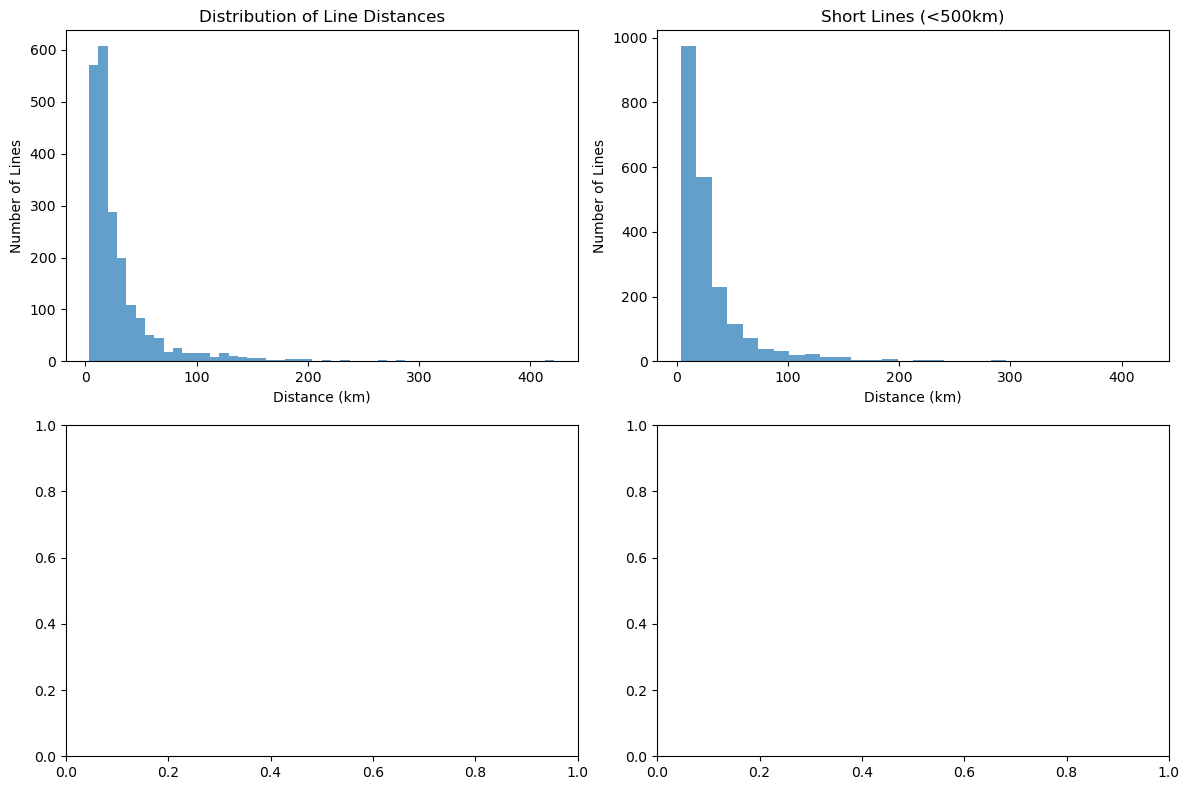

In [28]:
#Plot distance distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(line_distances, bins=50, alpha=0.7)
plt.xlabel('Distance (km)')
plt.ylabel('Number of Lines')
plt.title('Distribution of Line Distances')

plt.subplot(2, 2, 2)
plt.hist([d for d in line_distances if d < 500], bins=30, alpha=0.7)
plt.xlabel('Distance (km)')
plt.ylabel('Number of Lines')
plt.title('Short Lines (<500km)')

plt.subplot(2, 2, 3)
long_lines = [d for d in line_distances if d > 500]
if long_lines:
    plt.hist(long_lines, bins=20, alpha=0.7)
    plt.xlabel('Distance (km)')
    plt.ylabel('Number of Lines')
    plt.title('Long Lines (>500km)')

plt.subplot(2, 2, 4)
# Show longest lines
longest_lines = n.lines.nlargest(10, 'distance_km')[['bus0', 'bus1', 'distance_km', 'v_nom']]
print("10 longest transmission lines:")
print(longest_lines)

plt.tight_layout()
plt.show()

In [2]:
#see if the network is connected
import pypsa
import networkx as nx

n_10node_connected = pypsa.Network("/Users/antoniagrindrod/Documents/pypsa-earth_project/pypsa-earth-RL/networks/elec_s_10_ec_lc1.0_1h.nc")

# Check network topology
n_10node_connected.determine_network_topology()
print(f"Number of sub-networks: {len(n_10node_connected.sub_networks)}")
print("Sub-network info:")
print(n_10node_connected.sub_networks)

# Find isolated buses
connected_buses = set()
for sub_net in n_10node_connected.sub_networks.index:
    buses_in_subnet = n_10node_connected.buses[n_10node_connected.buses.sub_network == sub_net]
    if len(buses_in_subnet) > 1:  # Main grid
        connected_buses.update(buses_in_subnet.index)

isolated_buses = n_10node_connected.buses.index.difference(connected_buses)
print(f"Isolated buses in network: {len(isolated_buses)}")
print("Isolated bus details:")
print(n_10node_connected.buses.loc[isolated_buses])



INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_1h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


Number of sub-networks: 1
Sub-network info:
attribute  carrier slack_bus           obj
SubNetwork                                
0               AC     ZA0 0  SubNetwork 0
Isolated buses in network: 0
Isolated bus details:
Empty DataFrame
Columns: [v_nom, tag_substation, tag_area, lon, lat, country, x, y, control, generator, type, carrier, unit, v_mag_pu_set, v_mag_pu_min, v_mag_pu_max, sub_network]
Index: []


In [3]:
n_10node_connected.optimize(solver_name='gurobi')

Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
Index(['0'], dtype='object', name='SubNetwork')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
Index(['0'], dtype='object', name='SubNetwork')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-h2lrreqf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-h2lrreqf.lp


Reading time = 3.12 seconds


INFO:gurobipy:Reading time = 3.12 seconds


obj: 1655644 rows, 735843 columns, 2689326 nonzeros


INFO:gurobipy:obj: 1655644 rows, 735843 columns, 2689326 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1655644 rows, 735843 columns and 2689326 nonzeros


INFO:gurobipy:Optimize a model with 1655644 rows, 735843 columns and 2689326 nonzeros


Model fingerprint: 0xa1b4a81a


INFO:gurobipy:Model fingerprint: 0xa1b4a81a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [7e-01, 1e+04]


INFO:gurobipy:  Matrix range     [7e-01, 1e+04]


  Objective range  [1e-02, 1e+04]


INFO:gurobipy:  Objective range  [1e-02, 1e+04]


  Bounds range     [2e+00, 1e+03]


INFO:gurobipy:  Bounds range     [2e+00, 1e+03]


  RHS range        [8e-05, 8e+09]


INFO:gurobipy:  RHS range        [8e-05, 8e+09]


INFO:gurobipy:Warning: Model contains large rhs


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 1563299 rows and 369191 columns


INFO:gurobipy:Presolve removed 1563299 rows and 369191 columns


Presolve time: 2.93s


INFO:gurobipy:Presolve time: 2.93s


Presolved: 92345 rows, 366652 columns, 720799 nonzeros


INFO:gurobipy:Presolved: 92345 rows, 366652 columns, 720799 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.05s


INFO:gurobipy:Ordering time: 0.05s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.953e+05


INFO:gurobipy: AA' NZ     : 2.953e+05


 Factor NZ  : 6.063e+05 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 6.063e+05 (roughly 200 MB of memory)


 Factor Ops : 4.948e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.948e+06 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61438852e+12 -3.05947217e+14  1.75e+06 1.82e-12  4.05e+09     3s


INFO:gurobipy:   0   1.61438852e+12 -3.05947217e+14  1.75e+06 1.82e-12  4.05e+09     3s


   1   6.36723640e+10 -4.67042621e+13  5.73e+04 1.41e-11  1.77e+08     4s


INFO:gurobipy:   1   6.36723640e+10 -4.67042621e+13  5.73e+04 1.41e-11  1.77e+08     4s


   2   1.23166007e+10 -5.99001260e+12  3.26e+03 1.51e-11  1.35e+07     4s


INFO:gurobipy:   2   1.23166007e+10 -5.99001260e+12  3.26e+03 1.51e-11  1.35e+07     4s


   3   1.07615796e+10 -6.91583947e+11  2.87e+02 3.04e-10  1.31e+06     4s


INFO:gurobipy:   3   1.07615796e+10 -6.91583947e+11  2.87e+02 3.04e-10  1.31e+06     4s


   4   1.05249657e+10 -3.57959260e+10  1.05e+01 2.91e-11  6.93e+04     4s


INFO:gurobipy:   4   1.05249657e+10 -3.57959260e+10  1.05e+01 2.91e-11  6.93e+04     4s


   5   1.04331746e+10  3.83487531e+09  6.33e-01 1.15e-11  9.11e+03     4s


INFO:gurobipy:   5   1.04331746e+10  3.83487531e+09  6.33e-01 1.15e-11  9.11e+03     4s


   6   1.01995075e+10  7.70294487e+09  1.82e-01 8.66e-12  3.42e+03     4s


INFO:gurobipy:   6   1.01995075e+10  7.70294487e+09  1.82e-01 8.66e-12  3.42e+03     4s


   7   1.00584000e+10  8.94861474e+09  5.89e-02 5.97e-12  1.52e+03     4s


INFO:gurobipy:   7   1.00584000e+10  8.94861474e+09  5.89e-02 5.97e-12  1.52e+03     4s


   8   9.94936174e+09  9.44545275e+09  1.54e-02 8.44e-12  6.87e+02     4s


INFO:gurobipy:   8   9.94936174e+09  9.44545275e+09  1.54e-02 8.44e-12  6.87e+02     4s


   9   9.87576081e+09  9.65427305e+09  2.71e-03 7.86e-12  3.02e+02     4s


INFO:gurobipy:   9   9.87576081e+09  9.65427305e+09  2.71e-03 7.86e-12  3.02e+02     4s


  10   9.86725968e+09  9.69202039e+09  1.85e-03 7.86e-12  2.39e+02     5s


INFO:gurobipy:  10   9.86725968e+09  9.69202039e+09  1.85e-03 7.86e-12  2.39e+02     5s


  11   9.86544678e+09  9.70763717e+09  1.70e-03 7.86e-12  2.15e+02     5s


INFO:gurobipy:  11   9.86544678e+09  9.70763717e+09  1.70e-03 7.86e-12  2.15e+02     5s


  12   9.86418114e+09  9.71651688e+09  1.59e-03 4.80e-12  2.01e+02     5s


INFO:gurobipy:  12   9.86418114e+09  9.71651688e+09  1.59e-03 4.80e-12  2.01e+02     5s


  13   9.85816747e+09  9.74922581e+09  1.10e-03 4.22e-12  1.49e+02     5s


INFO:gurobipy:  13   9.85816747e+09  9.74922581e+09  1.10e-03 4.22e-12  1.49e+02     5s


  14   9.84517738e+09  9.82063987e+09  1.94e-04 5.06e-12  3.35e+01     5s


INFO:gurobipy:  14   9.84517738e+09  9.82063987e+09  1.94e-04 5.06e-12  3.35e+01     5s


  15   9.83975954e+09  9.83859900e+09  3.56e-05 2.40e-12  1.58e+00     5s


INFO:gurobipy:  15   9.83975954e+09  9.83859900e+09  3.56e-05 2.40e-12  1.58e+00     5s


  16   9.83923968e+09  9.83919849e+09  1.21e-05 5.82e-13  5.62e-02     5s


INFO:gurobipy:  16   9.83923968e+09  9.83919849e+09  1.21e-05 5.82e-13  5.62e-02     5s


  17   9.83922352e+09  9.83922011e+09  2.08e-05 8.88e-11  4.65e-03     5s


INFO:gurobipy:  17   9.83922352e+09  9.83922011e+09  2.08e-05 8.88e-11  4.65e-03     5s


  18   9.83922334e+09  9.83922331e+09  3.39e-07 3.24e-11  3.95e-05     5s


INFO:gurobipy:  18   9.83922334e+09  9.83922331e+09  3.39e-07 3.24e-11  3.95e-05     5s


  19   9.83922333e+09  9.83922333e+09  1.61e-07 4.80e-12  2.04e-09     6s


INFO:gurobipy:  19   9.83922333e+09  9.83922333e+09  1.61e-07 4.80e-12  2.04e-09     6s


INFO:gurobipy:


Barrier solved model in 19 iterations and 5.56 seconds (3.37 work units)


INFO:gurobipy:Barrier solved model in 19 iterations and 5.56 seconds (3.37 work units)


Optimal objective 9.83922333e+09


INFO:gurobipy:Optimal objective 9.83922333e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


      56 DPushes remaining with DInf 0.0000000e+00                 6s


INFO:gurobipy:      56 DPushes remaining with DInf 0.0000000e+00                 6s


       0 DPushes remaining with DInf 0.0000000e+00                 6s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 6s


INFO:gurobipy:


   35043 PPushes remaining with PInf 0.0000000e+00                 6s


INFO:gurobipy:   35043 PPushes remaining with PInf 0.0000000e+00                 6s


       0 PPushes remaining with PInf 0.0000000e+00                 7s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 7s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7462052e-10      7s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7462052e-10      7s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   35099    9.8392233e+09   0.000000e+00   0.000000e+00      8s


INFO:gurobipy:   35099    9.8392233e+09   0.000000e+00   0.000000e+00      8s


INFO:gurobipy:


Solved in 35099 iterations and 8.02 seconds (4.46 work units)


INFO:gurobipy:Solved in 35099 iterations and 8.02 seconds (4.46 work units)


Optimal objective  9.839223331e+09


INFO:gurobipy:Optimal objective  9.839223331e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 735843 primals, 1655644 duals
Objective: 9.84e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

In [4]:
def fix_artificial_lines_hardcoded(network):
    """
    Fix artificial lines with hardcoded values to match existing non-extendable lines:
    - s_nom = 442.4 (your desired capacity)
    - s_nom_extendable = False
    - s_nom_min = 0
    - s_nom_max = inf
    - extendable = False (if column exists)
    """
    print("=== FIXING ARTIFICIAL LINES WITH HARDCODED VALUES ===")
    fixed_capacity=442.4

    # Find artificial lines
    artificial_lines = [line for line in network.lines.index
                       if any(keyword in str(line).lower() for keyword in ['new', '<->', 'artificial'])]

    print(f"Found {len(artificial_lines)} artificial lines to fix:")

    # Fix each artificial line with hardcoded values
    for line_name in artificial_lines:
        print(f"\n🔧 Fixing: {line_name}")

        # s_nom = 442.4 (your fixed capacity)
        old_s_nom = network.lines.loc[line_name, 's_nom']
        network.lines.loc[line_name, 's_nom'] = fixed_capacity
        print(f"    s_nom: {old_s_nom} → {fixed_capacity}")

        # s_nom_extendable = False
        if 's_nom_extendable' not in network.lines.columns:
            network.lines['s_nom_extendable'] = False
        network.lines.loc[line_name, 's_nom_extendable'] = False
        print(f"    s_nom_extendable: → False")

        # s_nom_min = 0
        if 's_nom_min' not in network.lines.columns:
            network.lines['s_nom_min'] = 0.0
        network.lines.loc[line_name, 's_nom_min'] = 0.0
        print(f"    s_nom_min: → 0.0")

        # s_nom_max = inf
        if 's_nom_max' not in network.lines.columns:
            network.lines['s_nom_max'] = float('inf')
        network.lines.loc[line_name, 's_nom_max'] = float('inf')
        print(f"    s_nom_max: → inf")

    return network

In [5]:
fix_artificial_lines_hardcoded(n_10node_connected)
n_10node_connected.optimize(solver_name='gurobi')

Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
Index(['0'], dtype='object', name='SubNetwork')


=== FIXING ARTIFICIAL LINES WITH HARDCODED VALUES ===
Found 3 artificial lines to fix:

🔧 Fixing: lines new ZA0 4 <-> ZA2 0 AC
    s_nom: 0.0 → 442.4
    s_nom_extendable: → False
    s_nom_min: → 0.0
    s_nom_max: → inf

🔧 Fixing: lines new ZA0 0 <-> ZA1 0 AC
    s_nom: 0.0 → 442.4
    s_nom_extendable: → False
    s_nom_min: → 0.0
    s_nom_max: → inf

🔧 Fixing: lines new ZA0 0 <-> ZA3 0 AC
    s_nom: 0.0 → 442.4
    s_nom_extendable: → False
    s_nom_min: → 0.0
    s_nom_max: → inf


Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
Index(['0'], dtype='object', name='SubNetwork')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]
INFO:linopy.io: Writing time: 9.15s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-n7q3mdiy.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-n7q3mdiy.lp


Reading time = 3.54 seconds


INFO:gurobipy:Reading time = 3.54 seconds


obj: 1655640 rows, 735840 columns, 2636760 nonzeros


INFO:gurobipy:obj: 1655640 rows, 735840 columns, 2636760 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1655640 rows, 735840 columns and 2636760 nonzeros


INFO:gurobipy:Optimize a model with 1655640 rows, 735840 columns and 2636760 nonzeros


Model fingerprint: 0xf032452b


INFO:gurobipy:Model fingerprint: 0xf032452b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [9e-01, 4e+02]


INFO:gurobipy:  Matrix range     [9e-01, 4e+02]


  Objective range  [1e-02, 5e+01]


INFO:gurobipy:  Objective range  [1e-02, 5e+01]


  Bounds range     [2e+00, 1e+03]


INFO:gurobipy:  Bounds range     [2e+00, 1e+03]


  RHS range        [8e-05, 2e+06]


INFO:gurobipy:  RHS range        [8e-05, 2e+06]


Presolve removed 1454160 rows and 194732 columns


INFO:gurobipy:Presolve removed 1454160 rows and 194732 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


INFO:gurobipy:


Solved in 0 iterations and 0.67 seconds (0.27 work units)


INFO:gurobipy:Solved in 0 iterations and 0.67 seconds (0.27 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
INFO:linopy.solvers:Unable to save solution file. Raised error: Unable to retrieve attribute 'X'
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



('warning', 'infeasible_or_unbounded')

In [32]:
n_10node_connected.optimize(solver_name='gurobi')

Index(['0'], dtype='object', name='SubNetwork')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0'], dtype='object', name='SubNetwork')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing

Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-xlvx86yn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-xlvx86yn.lp


Reading time = 3.78 seconds


INFO:gurobipy:Reading time = 3.78 seconds


obj: 1655644 rows, 735843 columns, 2689326 nonzeros


INFO:gurobipy:obj: 1655644 rows, 735843 columns, 2689326 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1655644 rows, 735843 columns and 2689326 nonzeros


INFO:gurobipy:Optimize a model with 1655644 rows, 735843 columns and 2689326 nonzeros


Model fingerprint: 0xa33aa24f


INFO:gurobipy:Model fingerprint: 0xa33aa24f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [7e-01, 1e+04]


INFO:gurobipy:  Matrix range     [7e-01, 1e+04]


  Objective range  [1e-02, 1e+04]


INFO:gurobipy:  Objective range  [1e-02, 1e+04]


  Bounds range     [2e+00, 1e+03]


INFO:gurobipy:  Bounds range     [2e+00, 1e+03]


  RHS range        [8e-05, 8e+09]


INFO:gurobipy:  RHS range        [8e-05, 8e+09]


INFO:gurobipy:Warning: Model contains large rhs


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 1563299 rows and 369191 columns


INFO:gurobipy:Presolve removed 1563299 rows and 369191 columns


Presolve time: 2.61s


INFO:gurobipy:Presolve time: 2.61s


Presolved: 92345 rows, 366652 columns, 720799 nonzeros


INFO:gurobipy:Presolved: 92345 rows, 366652 columns, 720799 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.08s


INFO:gurobipy:Ordering time: 0.08s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.953e+05


INFO:gurobipy: AA' NZ     : 2.953e+05


 Factor NZ  : 6.063e+05 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 6.063e+05 (roughly 200 MB of memory)


 Factor Ops : 4.948e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.948e+06 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61438852e+12 -3.05947217e+14  1.75e+06 1.82e-12  4.05e+09     3s


INFO:gurobipy:   0   1.61438852e+12 -3.05947217e+14  1.75e+06 1.82e-12  4.05e+09     3s


   1   6.36723640e+10 -4.67042621e+13  5.73e+04 1.41e-11  1.77e+08     3s


INFO:gurobipy:   1   6.36723640e+10 -4.67042621e+13  5.73e+04 1.41e-11  1.77e+08     3s


   2   1.23166007e+10 -5.99001260e+12  3.26e+03 1.51e-11  1.35e+07     3s


INFO:gurobipy:   2   1.23166007e+10 -5.99001260e+12  3.26e+03 1.51e-11  1.35e+07     3s


   3   1.07615796e+10 -6.91583947e+11  2.87e+02 3.04e-10  1.31e+06     4s


INFO:gurobipy:   3   1.07615796e+10 -6.91583947e+11  2.87e+02 3.04e-10  1.31e+06     4s


   4   1.05249657e+10 -3.57959260e+10  1.05e+01 2.91e-11  6.93e+04     4s


INFO:gurobipy:   4   1.05249657e+10 -3.57959260e+10  1.05e+01 2.91e-11  6.93e+04     4s


   5   1.04331746e+10  3.83487531e+09  6.33e-01 1.15e-11  9.11e+03     4s


INFO:gurobipy:   5   1.04331746e+10  3.83487531e+09  6.33e-01 1.15e-11  9.11e+03     4s


   6   1.01995075e+10  7.70294487e+09  1.82e-01 8.66e-12  3.42e+03     4s


INFO:gurobipy:   6   1.01995075e+10  7.70294487e+09  1.82e-01 8.66e-12  3.42e+03     4s


   7   1.00584000e+10  8.94861474e+09  5.89e-02 5.97e-12  1.52e+03     4s


INFO:gurobipy:   7   1.00584000e+10  8.94861474e+09  5.89e-02 5.97e-12  1.52e+03     4s


   8   9.94936174e+09  9.44545275e+09  1.54e-02 8.44e-12  6.87e+02     4s


INFO:gurobipy:   8   9.94936174e+09  9.44545275e+09  1.54e-02 8.44e-12  6.87e+02     4s


   9   9.87576081e+09  9.65427305e+09  2.71e-03 7.86e-12  3.02e+02     4s


INFO:gurobipy:   9   9.87576081e+09  9.65427305e+09  2.71e-03 7.86e-12  3.02e+02     4s


  10   9.86725968e+09  9.69202039e+09  1.85e-03 7.86e-12  2.39e+02     4s


INFO:gurobipy:  10   9.86725968e+09  9.69202039e+09  1.85e-03 7.86e-12  2.39e+02     4s


  11   9.86544678e+09  9.70763717e+09  1.70e-03 7.86e-12  2.15e+02     5s


INFO:gurobipy:  11   9.86544678e+09  9.70763717e+09  1.70e-03 7.86e-12  2.15e+02     5s


  12   9.86418114e+09  9.71651688e+09  1.59e-03 4.80e-12  2.01e+02     5s


INFO:gurobipy:  12   9.86418114e+09  9.71651688e+09  1.59e-03 4.80e-12  2.01e+02     5s


  13   9.85816747e+09  9.74922581e+09  1.10e-03 4.22e-12  1.49e+02     5s


INFO:gurobipy:  13   9.85816747e+09  9.74922581e+09  1.10e-03 4.22e-12  1.49e+02     5s


  14   9.84517738e+09  9.82063987e+09  1.94e-04 5.06e-12  3.35e+01     5s


INFO:gurobipy:  14   9.84517738e+09  9.82063987e+09  1.94e-04 5.06e-12  3.35e+01     5s


  15   9.83975954e+09  9.83859900e+09  3.56e-05 2.40e-12  1.58e+00     5s


INFO:gurobipy:  15   9.83975954e+09  9.83859900e+09  3.56e-05 2.40e-12  1.58e+00     5s


  16   9.83923968e+09  9.83919849e+09  1.21e-05 5.82e-13  5.62e-02     5s


INFO:gurobipy:  16   9.83923968e+09  9.83919849e+09  1.21e-05 5.82e-13  5.62e-02     5s


  17   9.83922352e+09  9.83922011e+09  2.08e-05 8.88e-11  4.65e-03     5s


INFO:gurobipy:  17   9.83922352e+09  9.83922011e+09  2.08e-05 8.88e-11  4.65e-03     5s


  18   9.83922334e+09  9.83922331e+09  3.39e-07 3.24e-11  3.95e-05     6s


INFO:gurobipy:  18   9.83922334e+09  9.83922331e+09  3.39e-07 3.24e-11  3.95e-05     6s


  19   9.83922333e+09  9.83922333e+09  1.61e-07 4.80e-12  2.04e-09     6s


INFO:gurobipy:  19   9.83922333e+09  9.83922333e+09  1.61e-07 4.80e-12  2.04e-09     6s


INFO:gurobipy:


Barrier solved model in 19 iterations and 5.67 seconds (3.37 work units)


INFO:gurobipy:Barrier solved model in 19 iterations and 5.67 seconds (3.37 work units)


Optimal objective 9.83922333e+09


INFO:gurobipy:Optimal objective 9.83922333e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


      56 DPushes remaining with DInf 0.0000000e+00                 6s


INFO:gurobipy:      56 DPushes remaining with DInf 0.0000000e+00                 6s


       0 DPushes remaining with DInf 0.0000000e+00                 6s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 6s


INFO:gurobipy:


   35043 PPushes remaining with PInf 0.0000000e+00                 6s


INFO:gurobipy:   35043 PPushes remaining with PInf 0.0000000e+00                 6s


       0 PPushes remaining with PInf 0.0000000e+00                 7s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 7s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7462052e-10      7s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.7462052e-10      7s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   35099    9.8392233e+09   0.000000e+00   0.000000e+00      8s


INFO:gurobipy:   35099    9.8392233e+09   0.000000e+00   0.000000e+00      8s


INFO:gurobipy:


Solved in 35099 iterations and 8.13 seconds (4.46 work units)


INFO:gurobipy:Solved in 35099 iterations and 8.13 seconds (4.46 work units)


Optimal objective  9.839223331e+09


INFO:gurobipy:Optimal objective  9.839223331e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 735843 primals, 1655644 duals
Objective: 9.84e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

In [ ]:
#network50.lines.type.unique()
base_network=pypsa.Network("networks/base.nc")
base_network.lines.type.unique()










Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

array(['243-AL1/39-ST1A 20.0', 'Al/St 240/40 4-bundle 380.0',
       'Al/St 240/40 3-bundle 300.0', 'Al/St 560/50 4-bundle 750.0',
       'Al/St 240/40 2-bundle 220.0'], dtype=object)

In [ ]:
#network50.lines.type.unique()
base_network=pypsa.Network("networks/base.nc")
base_network.lines.type.unique()










Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 'transf_804_0', 'transf_811_0',
       'transf_826_0', 'transf_871_0', 'transf_991_0', 'transf_1037_0',
       'transf_1075_0', 'transf_1278_0'],
      dtype='object', name='name', length=309)
Index(['transf_0_0', 'transf_0_1', 'transf_0_2', 'transf_2_0', 'transf_2_1',
       'transf_3_0', 'transf_3_1', 'transf_4_0', 'transf_4_1', 'transf_5_0',
       ...
       'transf_741_0', 'transf_759_0', 't

array(['243-AL1/39-ST1A 20.0', 'Al/St 240/40 4-bundle 380.0',
       'Al/St 240/40 3-bundle 300.0', 'Al/St 560/50 4-bundle 750.0',
       'Al/St 240/40 2-bundle 220.0'], dtype=object)

In [1]:
import pypsa
def fix_artificial_lines_reasonable(network):
    """
    Fix artificial lines with reasonable capacity values:
    - s_nom = based on connected bus demand (with safety factor)
    - s_nom_extendable = False (non-extendable)
    - Keep capacity high enough to meet demand
    """
    print("=== FIXING ARTIFICIAL LINES WITH REASONABLE CAPACITY ===")
    
    # Find artificial lines
    artificial_lines = [line for line in network.lines.index
                       if any(keyword in str(line).lower() for keyword in ['new', '<->', 'artificial'])]
    
    if not artificial_lines:
        # If no artificial lines found by name, look for lines with s_nom=0
        # which is often a sign of artificial lines
        zero_capacity_lines = network.lines[network.lines.s_nom == 0].index.tolist()
        if zero_capacity_lines:
            artificial_lines = zero_capacity_lines
    
    print(f"Found {len(artificial_lines)} artificial lines to fix:")
    
    # Get maximum demand per bus across all snapshots
    bus_max_demand = {}
    for bus in network.buses.index:
        bus_demand = 0
        for load_name, load in network.loads.iterrows():
            if load.bus == bus and load_name in network.loads_t.p_set.columns:
                bus_demand = max(bus_demand, network.loads_t.p_set[load_name].max())
        bus_max_demand[bus] = bus_demand
    
    # Fix each artificial line with reasonable capacity
    for line_name in artificial_lines:
        # Get connected buses
        bus0 = network.lines.loc[line_name, 'bus0']
        bus1 = network.lines.loc[line_name, 'bus1']
        
        # Get maximum demand at these buses
        bus0_demand = bus_max_demand.get(bus0, 0)
        bus1_demand = bus_max_demand.get(bus1, 0)
        
        # Calculate required capacity with safety factor
        # Use 3x the higher demand to ensure adequate capacity
        safety_factor = 3.0
        required_capacity = max(bus0_demand, bus1_demand) * safety_factor
        
        # Ensure minimum reasonable capacity (1000 MW)
        required_capacity = max(required_capacity, 1000)
        
        print(f"\n🔧 Fixing: {line_name}")
        print(f"    Connected buses: {bus0} ↔ {bus1}")
        print(f"    Bus demands: {bus0}: {bus0_demand:.1f} MW, {bus1}: {bus1_demand:.1f} MW")
        
        # Set s_nom to required capacity
        old_s_nom = network.lines.loc[line_name, 's_nom']
        network.lines.loc[line_name, 's_nom'] = required_capacity
        print(f"    s_nom: {old_s_nom} → {required_capacity:.1f} MW")
        
        # Make sure line is not extendable
        if 's_nom_extendable' not in network.lines.columns:
            network.lines['s_nom_extendable'] = False
        network.lines.loc[line_name, 's_nom_extendable'] = False
        print(f"    s_nom_extendable: → False")
    
    return network

# Load the network
n = pypsa.Network("/Users/antoniagrindrod/Documents/pypsa-earth_project/pypsa-earth-RL/networks/elec_s_10_ec_lc1.0_1h.nc")


# Check for isolated buses before fixing
print("=== CHECKING FOR ISOLATED BUSES ===")
n.determine_network_topology()
if hasattr(n, 'sub_networks') and len(n.sub_networks) > 1:
    print(f"Network has {len(n.sub_networks)} disconnected sub-networks")
    print("This indicates isolated buses that need connecting")

# Check demand at problematic buses
print("\n=== DEMAND AT KEY BUSES ===")
for bus in ['ZA1 0', 'ZA2 0', 'ZA3 0']:
    if bus in n.buses.index:
        bus_demand = 0
        for load_name, load in n.loads.iterrows():
            if load.bus == bus and load_name in n.loads_t.p_set.columns:
                bus_demand = n.loads_t.p_set[load_name].max()
        print(f"Bus {bus} maximum demand: {bus_demand:.1f} MW")

# Apply the reasonable capacity fix
fix_artificial_lines_reasonable(n)

# Try optimizing
try:
    n.optimize(solver_name='gurobi')
    print("\n✅ SUCCESS! Network optimized successfully with reasonable line capacities")
    print(f"Objective: {n.objective:,.0f}")
    
    # Save this working network
    n.export_to_netcdf("elec_s_10_ec_lc1.0_1h_reasonable.nc")
    print("💾 Saved network as: elec_s_10_ec_lc1.0_1h_reasonable.nc")
    
except Exception as e:
    print(f"\n❌ Optimization failed: {e}")
    
    # If optimization failed, try adding artificial lines
    print("\n=== TRYING TO ADD ARTIFICIAL LINES ===")
    
    # Check if we need to add artificial lines
    isolated_buses = []
    for bus in n.buses.index:
        bus_in_lines = False
        for idx, line in n.lines.iterrows():
            if line.bus0 == bus or line.bus1 == bus:
                bus_in_lines = True
                break
        if not bus_in_lines:
            isolated_buses.append(bus)
    
    if isolated_buses:
        print(f"Found {len(isolated_buses)} isolated buses: {isolated_buses}")
        
        # Connect isolated buses to main grid
        main_grid_bus = "ZA0 0"  # Assuming ZA0 0 is part of main grid
        
        for isolated_bus in isolated_buses:
            line_name = f"artificial_line_{main_grid_bus}_to_{isolated_bus}"
            
            # Get maximum demand at isolated bus
            bus_demand = 0
            for load_name, load in n.loads.iterrows():
                if load.bus == isolated_bus and load_name in n.loads_t.p_set.columns:
                    bus_demand = max(bus_demand, n.loads_t.p_set[load_name].max())
            
            # Set capacity to 3x demand with minimum 1000 MW
            capacity = max(bus_demand * 3, 1000)
            
            # Add the line
            n.add("Line", line_name,
                  bus0=main_grid_bus,
                  bus1=isolated_bus,
                  s_nom=capacity,
                  s_nom_extendable=False,
                  length=500,  # Reasonable assumption
                  r=0.01, x=0.1)  # Standard transmission parameters
            
            print(f"Added line: {main_grid_bus} ↔ {isolated_bus} with {capacity:.1f} MW capacity")
        
        # Try optimizing again
        try:
            n.optimize(solver_name='gurobi')
            print("\n✅ SUCCESS! Network optimized successfully after adding artificial lines")
            print(f"Objective: {n.objective:,.0f}")
            
            # Save the optimized network
            network.export_to_netcdf("/Users/antoniagrindrod/Desktop/optimized_elec_s_10_ec_lc1.0_1h.nc")
            print("Optimization complete and saved!")
            
        except Exception as e2:
            print(f"\n❌ Still failed after adding artificial lines: {e2}")


INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_1h.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0'], dtype='object', name='SubNetwork')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')


=== CHECKING FOR ISOLATED BUSES ===

=== DEMAND AT KEY BUSES ===
Bus ZA1 0 maximum demand: 1386.9 MW
Bus ZA2 0 maximum demand: 452.6 MW
Bus ZA3 0 maximum demand: 721.1 MW
=== FIXING ARTIFICIAL LINES WITH REASONABLE CAPACITY ===
Found 3 artificial lines to fix:

🔧 Fixing: lines new ZA0 4 <-> ZA2 0 AC
    Connected buses: ZA0 4 ↔ ZA2 0
    Bus demands: ZA0 4: 15945.8 MW, ZA2 0: 452.6 MW
    s_nom: 0.0 → 47837.3 MW
    s_nom_extendable: → False

🔧 Fixing: lines new ZA0 0 <-> ZA1 0 AC
    Connected buses: ZA0 0 ↔ ZA1 0
    Bus demands: ZA0 0: 3513.0 MW, ZA1 0: 1386.9 MW
    s_nom: 0.0 → 10538.9 MW
    s_nom_extendable: → False

🔧 Fixing: lines new ZA0 0 <-> ZA3 0 AC
    Connected buses: ZA0 0 ↔ ZA3 0
    Bus demands: ZA0 0: 3513.0 MW, ZA3 0: 721.1 MW
    s_nom: 0.0 → 10538.9 MW
    s_nom_extendable: → False


Index(['ZA0 0', 'ZA0 1', 'ZA0 2', 'ZA0 3', 'ZA0 4', 'ZA0 5', 'ZA0 6', 'ZA0 7',
       'ZA0 8', 'ZA0 9', 'ZA1 0', 'ZA2 0', 'ZA3 0'],
      dtype='object', name='Bus')
Index(['0'], dtype='object', name='SubNetwork')
Index(['0', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
       '7', '8', '9', 'lines new ZA0 4 <-> ZA2 0 AC',
       'lines new ZA0 0 <-> ZA1 0 AC', 'lines new ZA0 0 <-> ZA3 0 AC'],
      dtype='object', name='Line')
INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]
INFO:linopy.io: Writing time: 8.06s


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2695191


INFO:gurobipy:Set parameter LicenseID to value 2695191


Academic license - for non-commercial use only - expires 2026-08-12


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-08-12


Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-qjwv9qf3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/tt/b5q5vkxj6xvf2b6q1f46ytgw0000gn/T/linopy-problem-qjwv9qf3.lp


Reading time = 3.18 seconds


INFO:gurobipy:Reading time = 3.18 seconds


obj: 1655640 rows, 735840 columns, 2636760 nonzeros


INFO:gurobipy:obj: 1655640 rows, 735840 columns, 2636760 nonzeros


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G84)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1655640 rows, 735840 columns and 2636760 nonzeros


INFO:gurobipy:Optimize a model with 1655640 rows, 735840 columns and 2636760 nonzeros


Model fingerprint: 0xb296f886


INFO:gurobipy:Model fingerprint: 0xb296f886


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [9e-01, 4e+02]


INFO:gurobipy:  Matrix range     [9e-01, 4e+02]


  Objective range  [1e-02, 5e+01]


INFO:gurobipy:  Objective range  [1e-02, 5e+01]


  Bounds range     [2e+00, 1e+03]


INFO:gurobipy:  Bounds range     [2e+00, 1e+03]


  RHS range        [8e-05, 2e+06]


INFO:gurobipy:  RHS range        [8e-05, 2e+06]


Presolve removed 1563301 rows and 369196 columns


INFO:gurobipy:Presolve removed 1563301 rows and 369196 columns


Presolve time: 2.37s


INFO:gurobipy:Presolve time: 2.37s


Presolved: 92339 rows, 366644 columns, 720781 nonzeros


INFO:gurobipy:Presolved: 92339 rows, 366644 columns, 720781 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.07s


INFO:gurobipy:Ordering time: 0.07s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.952e+05


INFO:gurobipy: AA' NZ     : 2.952e+05


 Factor NZ  : 5.928e+05 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 5.928e+05 (roughly 200 MB of memory)


 Factor Ops : 4.987e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 4.987e+06 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.21798632e+11 -7.59016259e+12  1.25e+05 5.68e-14  1.68e+07     3s


INFO:gurobipy:   0   1.21798632e+11 -7.59016259e+12  1.25e+05 5.68e-14  1.68e+07     3s


   1   1.40211237e+10 -2.68706133e+11  6.13e+03 4.12e-13  6.38e+05     3s


INFO:gurobipy:   1   1.40211237e+10 -2.68706133e+11  6.13e+03 4.12e-13  6.38e+05     3s


   2   1.10959005e+10 -3.01049737e+10  1.01e+03 1.48e-12  9.00e+04     3s


INFO:gurobipy:   2   1.10959005e+10 -3.01049737e+10  1.01e+03 1.48e-12  9.00e+04     3s


   3   1.04027639e+10  6.06090294e+09  3.81e+01 1.53e-12  6.71e+03     3s


INFO:gurobipy:   3   1.04027639e+10  6.06090294e+09  3.81e+01 1.53e-12  6.71e+03     3s


   4   1.01136244e+10  7.11494847e+09  3.05e+00 1.02e-12  4.14e+03     3s


INFO:gurobipy:   4   1.01136244e+10  7.11494847e+09  3.05e+00 1.02e-12  4.14e+03     3s


   5   9.98568351e+09  9.29584539e+09  7.28e-01 3.68e-13  9.46e+02     4s


INFO:gurobipy:   5   9.98568351e+09  9.29584539e+09  7.28e-01 3.68e-13  9.46e+02     4s


   6   9.85637881e+09  9.54392237e+09  1.18e-01 3.96e-13  4.27e+02     4s


INFO:gurobipy:   6   9.85637881e+09  9.54392237e+09  1.18e-01 3.96e-13  4.27e+02     4s


   7   9.84690200e+09  9.59419083e+09  8.89e-02 3.96e-13  3.45e+02     4s


INFO:gurobipy:   7   9.84690200e+09  9.59419083e+09  8.89e-02 3.96e-13  3.45e+02     4s


   8   9.83936837e+09  9.67400085e+09  6.81e-02 4.82e-13  2.26e+02     4s


INFO:gurobipy:   8   9.83936837e+09  9.67400085e+09  6.81e-02 4.82e-13  2.26e+02     4s


   9   9.81871201e+09  9.77815077e+09  1.60e-02 4.73e-13  5.53e+01     4s


INFO:gurobipy:   9   9.81871201e+09  9.77815077e+09  1.60e-02 4.73e-13  5.53e+01     4s


  10   9.81158979e+09  9.80591961e+09  4.59e-03 4.82e-13  7.74e+00     4s


INFO:gurobipy:  10   9.81158979e+09  9.80591961e+09  4.59e-03 4.82e-13  7.74e+00     4s


  11   9.80848837e+09  9.80824093e+09  1.94e-04 2.55e-13  3.38e-01     4s


INFO:gurobipy:  11   9.80848837e+09  9.80824093e+09  1.94e-04 2.55e-13  3.38e-01     4s


  12   9.80833794e+09  9.80831713e+09  1.02e-05 2.10e-11  2.84e-02     4s


INFO:gurobipy:  12   9.80833794e+09  9.80831713e+09  1.02e-05 2.10e-11  2.84e-02     4s


  13   9.80832949e+09  9.80832876e+09  8.79e-06 1.05e-11  9.88e-04     4s


INFO:gurobipy:  13   9.80832949e+09  9.80832876e+09  8.79e-06 1.05e-11  9.88e-04     4s


  14   9.80832945e+09  9.80832944e+09  1.83e-07 4.63e-12  9.75e-06     4s


INFO:gurobipy:  14   9.80832945e+09  9.80832944e+09  1.83e-07 4.63e-12  9.75e-06     4s


  15   9.80832945e+09  9.80832945e+09  6.44e-08 5.68e-14  9.75e-09     5s


INFO:gurobipy:  15   9.80832945e+09  9.80832945e+09  6.44e-08 5.68e-14  9.75e-09     5s


INFO:gurobipy:


Barrier solved model in 15 iterations and 4.52 seconds (3.00 work units)


INFO:gurobipy:Barrier solved model in 15 iterations and 4.52 seconds (3.00 work units)


Optimal objective 9.80832945e+09


INFO:gurobipy:Optimal objective 9.80832945e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


      32 DPushes remaining with DInf 0.0000000e+00                 5s


INFO:gurobipy:      32 DPushes remaining with DInf 0.0000000e+00                 5s


       0 DPushes remaining with DInf 0.0000000e+00                 5s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                 5s


INFO:gurobipy:


   35044 PPushes remaining with PInf 0.0000000e+00                 5s


INFO:gurobipy:   35044 PPushes remaining with PInf 0.0000000e+00                 5s


    9313 PPushes remaining with PInf 0.0000000e+00                 5s


INFO:gurobipy:    9313 PPushes remaining with PInf 0.0000000e+00                 5s


       0 PPushes remaining with PInf 0.0000000e+00                 5s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                 5s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3075275e-10      5s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 2.3075275e-10      5s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   35075    9.8083294e+09   0.000000e+00   0.000000e+00      6s


INFO:gurobipy:   35075    9.8083294e+09   0.000000e+00   0.000000e+00      6s


INFO:gurobipy:


Solved in 35075 iterations and 6.47 seconds (3.98 work units)


INFO:gurobipy:Solved in 35075 iterations and 6.47 seconds (3.98 work units)


Optimal objective  9.808329447e+09


INFO:gurobipy:Optimal objective  9.808329447e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 735840 primals, 1655640 duals
Objective: 9.81e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Line-fix-s-lower, Line-fix-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Voltage-Law, StorageUnit-energy_balance were not assigned to the network.



✅ SUCCESS! Network optimized successfully with reasonable line capacities
Objective: 9,808,329,447


INFO:pypsa.io:Exported network 'elec_s_10_ec_lc1.0_1h_reasonable.nc' contains: loads, storage_units, buses, generators, carriers, global_constraints, lines


💾 Saved network as: elec_s_10_ec_lc1.0_1h_reasonable.nc
